# Trabalho 1

## Nome:
### Leonardo Ishida - 12873424
### Isaac Harim Ribeiro Rosendo - 13673235

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

#Questão 1

Ambas as funções implementam a decomposição LU, retornando duas matrizes triangulares superiores e inferiores. De primeira análise, conseguimos distinguir o código com suas definições e nos parâmetros. Enquanto a "func1" possui apenas a entrada do parâmetro "A", a "func2" introduz o parâmetro adicional "p". Podemos rodar o codigo e analisar oque esse parâmetros podem influenciar.

#####Funções dada para teste

In [ ]:

def func1(A):
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)
  for j in range(n - 1):
     for i in range(j + 1,n):
        L[i,j] = U[i,j] / U[j,j]
        U[i,j:n] = U[i,j:n] - L [i,j] * U[j,j:n]

  return (L,U)


def func2(A):
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)
  for j in range(n - 1):
    v = min(n,j + p + 1)
    for i in range(j + 1,v):
      L[i,j] = U[i,j] / U[j,j]
      U[i,j: v] = U[i,j: v] - L[i,j] * U[j,j: v]

  return (L,U)

Usando parametros como $n = 200$ e $P = 2$, iremos testar ambos as funções e determinar qual a principal diferença entre os códigos.




#####Caso de teste func 1

In [ ]:
n = 2000
p = 2

A = np.zeros((n, n))
for i in range(n):
    for j in range(max(0, i - p), min(n, i + p + 1)):
        A[i, j] = np.random.normal()

start_time = time.time()
(L, U) = func1(A)
end_time = time.time()
print(end_time - start_time)

15.272077322006226


#####Caso de teste func 2

In [ ]:
n = 2000
p = 2

A = np.zeros((n, n))
for i in range(n):
    for j in range(max(0, i - p), min(n, i + p + 1)):
        A[i, j] = np.random.normal()

start_time = time.time()
(L, U) = func2(A)

end_time = time.time()
print(end_time - start_time)

0.07822251319885254


##### Conclusão

A adição do parâmetro "p" na função "func2" traz vantagens significativas ao código. Ao limitar o número de linhas consideradas em cada coluna durante o processo de decomposição LU, o parâmetro "p" permite uma abordagem mais específica e adaptável para diferentes tipos de matrizes. Isso é especialmente útil em casos onde a matriz possui estruturas especiais, como esparsidade ou padrões específicos de valores, onde o desempenho de algoritmos pode ser significativamente otimizado ao considerar apenas uma vizinhança local de cada elemento. Podemos observar essa melhora principalmente no tempo de processamento dado no exemplo acima, processando a mesma matriz, a "func 1" teve um gasto de $15$ segundos enquanto a "func 2" nem bateu a marca de $1$ segundo de processamento. Além disso, a flexibilidade oferecida pela inclusão do parâmetro "p" permite ajustar o desempenho da decomposição LU de acordo com os requisitos de precisão e eficiência do problema em questão.

# Questão 2

In [ ]:
A = np.array([
    [4, -2, 1, 0, 0, 0],
    [-2, 7, -2, 1, 0, 0],
    [1, -2, 7, -2, 1, 0],
    [0, 1, -2, 7, -2, 1],
    [0, 0, 1, -2, 7, -2],
    [0, 0, 0, 1, -2, 4]
])

b = np.array([-1, -2, 1, 1, -2, -1]).T

### Item A:

### Gauss-Jacobi
Para obter $Cⱼ$ e $gⱼ$, precisamos decompor nossa nosso sistema $Ax = b$ de forma que:   
$$x^{k+1} = Cx^{k} + g$$
Inicialmente, temos que verificar se: $$aᵢᵢ \neq0, ∀i=1,...,n$$
Feita a verificação, podemos obter $x^{k+1}$ isolando $xₙ$ de cada linha da equação do sistema. Dessa forma, teremos um sistema da seguinte forma:
$$  x_{1}^{k+1} = (b_{1}-[a_{12}x_{2}^{k} + ... + a_{1n}x_{n}^{k}])/a_{11} $$
$$\vdots$$
$$ x_{n}^{k+1} = (b_{n}-[a_{n1}x_{2}^{k} + ... + a_{nn-1}x_{n-1}^{k}])/a_{nn} $$

Computacionalmente, podemos obter a equação acima, de maneira eficiente, utilizando a matriz diagonal $D$ de $A$.
$$(A - D + D)x = b$$
$$(A - D)x^{k} + Dx^{k+1} = b$$
$$Dx^{k+1} = (D - A)x^{k} + b$$
$$x^{k+1} = (I - D^{-1}A)x^{k} + D^{-1}b$$
$$x^{k+1} = Cx^{k} + g$$

Agora, com a matriz $D$ calculada, vamos resolver
$$ I - D^{-1}A = C$$
$$ D^{-1}b = g$$

In [ ]:
def getCJacobi(A, D):
    n = np.shape(A)[0]
    return np.identity(n) - np.linalg.inv(D) @ A

In [ ]:
def getGJacobi(D, b):
    return np.linalg.inv(D) @ b

In [ ]:
n = np.shape(A)[0]
D = np.diag(np.diag(A))

print(f'C:\n {getCJacobi(A, D)} \n\n g:\n {getGJacobi(D, b)}')

C:
 [[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]] 

 g:
 [-0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]


### Gauss-Seidl
Para calcularmos $Cₛ$ e $gₛ$ precisamos decompor nosso sistema:   
$$Ax = b$$ de forma que:
$$x^{k+1} = Cx^{k} + g$$
Após fazer a verificação dos valores da diagonal principal, que tem quer ser diferentes de 0, obteremos aquele mesmo sistema mostrado acima, com o vetor $x^{k+1}$ isolado.  
Para isso, vamos decompor A = L + R, em que L é a matriz triagular inferior de A, e R é a matriz triangular superior de A sem a diagonal.   
$$(L + R)x = b$$
$$Lx^{k+1} + Rx^{k} = b$$
$$x^{k+1} = (-L^{-1}R)x^{k} + L^{-1}b$$
$$x^{k+1} = Cx^{k} + g$$

Para realizar essa tarefa, em tremos de código, podemos utilizar as funções triu e tril do numpy em $A$. Dessa forma, obteremos as matrizes L e R que precisamos para calcular $Cₛ$ e $gₛ$

Agora, como temos as matrizes L e R, podemos calcular tanto Cₛ quanto gₛ. Para isso, resolveremos as seguintes equações:   
$$
Cₛ = -L^{-1} R
$$
$$
gₛ = L^{-1} b
$$

In [ ]:
def getCSeidl(L, R):
    return -np.linalg.inv(L) @ R

def getGSeidl(L, b):
    return np.linalg.inv(L) @ b

In [ ]:
L = np.tril(A)
R = np.triu(A, 1)

print(f'C:\n {getCSeidl(L, R)} \n\n g:\n {getGSeidl(L, b)}')

C:
 [[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.          0.14285714  0.21428571 -0.14285714  0.          0.        ]
 [ 0.         -0.03061224  0.09693878  0.24489796 -0.14285714  0.        ]
 [ 0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.14285714]
 [ 0.         -0.00395668 -0.01468138 -0.00916285  0.09037901  0.24489796]
 [ 0.          0.00531029 -0.00661183 -0.02717618 -0.01603499  0.15816327]] 

 g:
 [-0.25       -0.35714286  0.07653061  0.21574344 -0.23500625 -0.42143898]


### Item B:

### Gauss-Jacobi

Para verificar se os métodos citado convergem, precisamos fazer algumas verificações na matriz A.
No caso do método de Gauss-Jacobi, a convergência é verificada utilizando o conceito de diagonal dominante, ou seja, temos que verificar se o elemento da diagonal dominante, em módulo, é maior que a soma, em módulo, dos elementos da linha. É possível rearranjar as linhas da matriz $A$ e do vetores $x$ e $b$ para tentar fazer com que o sistema atenda ao critério.
$$
|a_{ii}| > \sum_{j{\neq}i}^{∞}|a_{ij}|
$$

In [ ]:
def verificaJacobi(A):
    n = np.shape(A)[0]

    for i in range(n):
        soma = 0

        aii = np.abs(A[i][i])
        if aii == 0:
            return False

        for j in range(n):
            # nao quero somar aii
            if i == j:
                continue

            soma += np.abs(A[i][j])

        # Soma dos elementos que nao fazem parte da diagonal principal é maior que aii
        if soma > aii:
            return False

    return True

In [ ]:
if verificaJacobi(A):
    print(f'É possível resolver o sistema por gauss-jacobi')
else:
    print(f'Não é possível resolver o sistema por gauss-jacobi')


É possível resolver o sistema por gauss-jacobi


### Gauss-Seidl

No método de Gauss-Seidl, podemos usar o método da diagonal dominante também, porém, o critério de Sassenfield é mais indicado, pois o critério da matriz dominante é um subcaso do critério de Sassenfield, ou seja, matrizes que não convergem com o método da diagonal dominante podem convergir com o critério de Sassenfield, ao utilizar o método de Gauss-Seidl.   
Nesse caso, temos que calcular os n $β$ da nossa matriz, e verificar se o maior $β$ é menor que 1, ou analogamente, verificar se todos os $β$ sao menores que 1.   
A equação do cálculo do $β$ está descrita abaixo.
$$
\betaᵢ = (\frac{1}{|aᵢᵢ|}) ( \sum_{j=1}^{i-1}|aᵢⱼ|\betaⱼ + \sum_{j=i+1}^{n}|aᵢⱼ|) < 1, ∀i = 1, ..., n
$$

In [ ]:
def verificaSeidl(A):
    n = np.shape(A)[0]
    betas = np.array([0 for _ in range(n)])

    for i in range(n):
        num = np.sum(np.abs(A[i, :i]) * betas[:i]) + np.sum(np.abs(A[i, i+1:]))

        den = np.abs(A[i][i])
        if den == 0:
            return False

        betas[i] = num / den

    return max(betas) < 1

In [ ]:
if verificaSeidl(A):
    print(f'É possível resolver o sistema usando o método de gauss-seidl')
else:
    print(f'Não é possível resolver o sistema usando o método de gauss-seidl')

É possível resolver o sistema usando o método de gauss-seidl


### Item C:

### Metódo de Gauss-Jacobi

Como foi mostrado no item A, fazemos a decomposição da matriz $A$ e obtemos a seguinte equação:
$$(A - D + D)x = b$$
$$(A - D)x^{k} + Dx^{k+1} = b$$
$$Dx^{k+1} = (D - A)x^{k} + b$$
$$x^{k+1} = (I - D^{-1}A)x^{k} + D^{-1}b$$
Dessa forma, vamos obter a resposta do nosso sistema iterando, até o critério de parada, a última equação:
$$x^{k+1} = (I - D^{-1}A)x^{k} + D^{-1}b$$


In [ ]:
def gaussJacobi(A, b, x0, erro):
    if verificaJacobi(A) == False:
        return x0, [], []

    n = np.shape(A)[0]
    D = np.diag(np.diag(A))

    C = getCJacobi(A, D)
    g = getGJacobi(D, b)

    iteracoes = np.array([])
    erros = np.array([])
    k = 0

    while True:
        x = C.dot(x0) + g

        erro_atual = np.linalg.norm(x - x0)
        erros = np.append(erros, erro_atual)

        k += 1
        iteracoes = np.append(iteracoes, k)

        x0 = x
        if erro_atual < erro:
            return x0, iteracoes, erros

    return x0, iteracoes, erros

In [ ]:
x, iteracoes, erros = gaussJacobi(A, b, np.array([1, 0, 0, 0, 0, 0]), 1e-8)
print(f'A solução do sistema é {x} e conseguimos com {max(iteracoes)} iterações')

A solução do sistema é [-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478] e conseguimos com 73.0 iterações


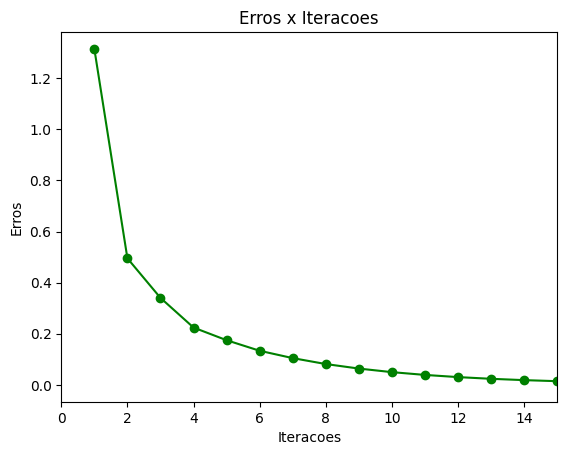

In [ ]:
fig, ax = plt.subplots()

ax.set_title("Erros x Iteracoes")
ax.set_xlabel("Iteracoes")
ax.set_ylabel("Erros")
ax.plot(iteracoes, erros, color="green", marker="o")
ax.set_xlim([0, 15])
plt.show()

### Metódo de Gauss-Seidl
Como é possível notar, os dois métodos se assemelham muito, pelo menos no início dos cálculos a serem realizados, até a parte da decomposição de $A$, porém, o diferencial do método de Gauss-Seidl em relação ao método de Gauss-Jacobi, é a sua eficiência e o seu critério de convergência(esse será discutido nos próximos items).   
No método de Gauss-Seidl, podemos utilizar os valores atualizados de $x_{i}^{k+1}$ para $i < j$, no cálculo de $x_{j}^{k+1}$, ou seja, estamos utilizando, o quanto antes, os valores de $x$ que mais se aproximam da solução do nosso sistema ao longo das iterações.   
Dessa forma, precisamos de menos iterações para conseguirmos atingir nosso critério de parada, mesmo que os dois métodos possuam a mesma complexidade algorítimica após os cálculos de $C$ e $g$.   


In [ ]:
def gaussSeidl(A, b, x0, erro):
    if verificaSeidl(A) == False:
        return x0

    n = np.shape(A)[0]

    L = np.tril(A)
    R = np.triu(A, 1)

    C = getCSeidl(L,R)
    g = getGSeidl(L, b)
    x = np.array([0 for _ in range(n)])

    erros = np.array([])
    iteracoes = np.array([])
    k = 0

    while True:
        x = C @ x0 + g

        erro_atual = np.linalg.norm(x - x0)
        erros = np.append(erros,erro_atual)

        k += 1
        iteracoes = np.append(iteracoes, k)

        x0 = x

        if erro_atual < erro:
            return x0, iteracoes, erros

    return x0, iteracoes, erros

In [ ]:
x, iteracoes, erros = gaussSeidl(A, b, np.array([1, 0, 0, 0, 0, 0]), 1e-8)
print(f'A solução do sistema é {x} e conseguimos com {max(iteracoes)} iterações')

A solução do sistema é [-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478] e conseguimos com 15.0 iterações


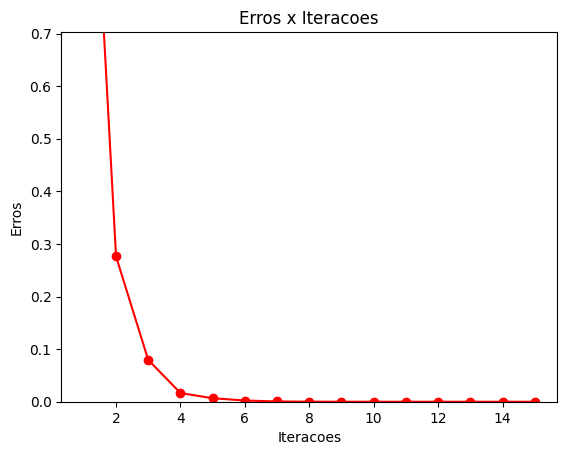

In [ ]:
fig, ax = plt.subplots()

ax.set_title("Erros x Iteracoes")
ax.set_xlabel("Iteracoes")
ax.set_ylabel("Erros")
ax.plot(iteracoes, erros, color="red", marker="o")
ax.set_ylim(bottom=0, top=max(erros)*0.5)
plt.show()

Agora, analisando os gráficos, é possível observar uma nítida diferença na "velocidade" da convergência dos dois métodos. Enquanto o método de Gauss-Seidl precisa de, aproximadamente, 5 iterações para chegar em um erro muito próximo de zero, o método de Gauss-Jacobi precisa de mais de 15 iterações

#Questão 3

###Item A

Para encontrar a solução, primeiramente, temos que igualar $p(x)$ e $q(x)$, pois queremos encontrar os pontos nos quais as duas funções possuem os mesmos valores no eixo y. Chamaremos essa função resultante de $f$.
$$ \begin{cases} q(x) = -x^{2}+5x+0.75 \\ p(x) = -x^{4}+7.7x^{3}-18x^{2}+13.6x \end{cases} $$

$$ f(x) = p(x) - q(x)$$
$$ f(x) = -x^{4}+7.7x^{3}-18x^{2}+13.6x +x^{2}-5x-0.75$$
$$ f(x) = -x^{4}+7.7x^{3}-17x^{2}+8.6x -0.75 $$
Após isso, teremos nossa $f:	\mathbb{R} → 	\mathbb{R}$ e poderemos utilizar o método da bisseção para encontrar, iterativamente, as raízes de $f$, que significa encontrar os pontos de inserseção entre $p(x)$ e $q(x)$.   
Em relação ao método da bisseção, optamos por utilizar o erro absoluto, devido ao baixo número de iterações, não achamos necessário utilizar um cirtério de parada mais robusto e que entregue maior precisão.   
Para fazer o "chute" inicial do intervalo, analisamos tanto o gráfico fornecido pelo trabalho, quanto o gráfico de $f(x)$, e, a partir dessas informações, conseguimos inferir que o intervalo desejado está ao redor de $x=3$, então, achamos oportuno utilizar $[3, 3.3]$

In [ ]:
def bissecao(func, a, b, tol):
    x = (a + b) / 2
    erro = np.inf
    k = 0
    kmax = 5

    while erro > tol and k < kmax:
        k = k + 1

        if func(a) * func(x) < 0:
            b = x
        else:
            a = x

        x0 = x
        x = (a + b) / 2

        erro = abs(x-x0)

    return x, k

In [ ]:
f = lambda x: -x**4 + 7.7*(x**3) - 17*(x**2) + 8.6*x - 0.75
p = lambda x: -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x

a = 3
b = 3.3
tol = 0.001

raiz, iteracoes = bissecao(f, a, b, tol)

print("A raiz é ", raiz , "com x iterações", iteracoes, "e a altura do impacto é de", p(raiz))

A raiz é  3.1734375000000004 com x iterações 5 e a altura do impacto é de 6.549350357812649


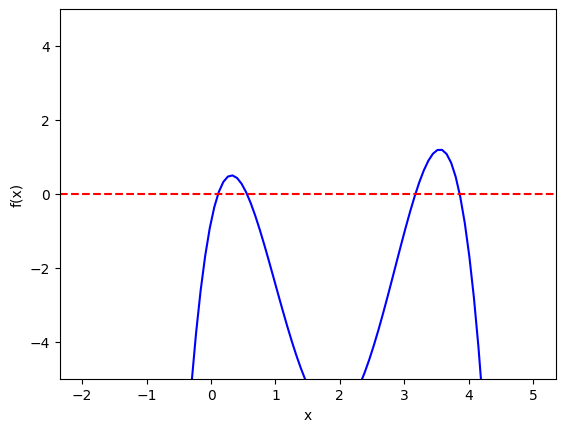

In [ ]:
fig, ax = plt.subplots()

ax.set_title("")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

xGrafico = np.linspace(-2, 5, 100)
fGrafico = f(xGrafico)

ax.plot(xGrafico, fGrafico, color="blue")
ax.set_ylim(bottom=-5, top=5)
plt.axhline(0, color='red', linestyle='--')
plt.show()

###Item B


Para resolver o problema utilizando as ferramentas pedidas, temos que, primeiramente, fazer algumas adpatações em nossas funções, pois o método de Newton para sistemas, utiliza funções de várias variáveis.
$$ f1(x, y) = p(x) - y $$
$$ f1(x, y) =  -x^4 + 7.7x^3 - 18x^2 + 13.6x - y$$
$$ f2(x, y) = q(x) - y $$
$$ f2(x, y) = -x^2 + 5x + 0.75 - y $$   
$$ F(X) = (f1, f2)^{T}$$
$$ X = (x, y)^{T} $$

Agora, precisamos calcular a matriz jacobiana de F.   
Após obter a matriz jacobiana, temos o que precisamos para começar a resolver o nosso sistema.   
Vamos obter $x_{k+1}$, através de $x_k$ linearizando $F(X) = \vec{0}^{\,}$, dessa forma, obtemos:   
$$ \vec{0}^{\,} = F(X_k) + J(X_k)v_k$$, onde $J$ é a matriz jacobiana de F, e v é o vetor solução do sistema.  
\
\begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}
\
\
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix}
\
O processo iterativo ocorre reolvendo:
$$J(X_k)v_k = F(X_k)$$
e depois atualizando o valor de $x_{k+1}$:
$$x_{k+1} = x_{k} - v_k$$
Em termos de código, podemos calcular $v_k$ resolvendo o sistema:
$$
v_k = J(X_k) F(X_k)
$$

Em relação ao critério de parada escolhido, optamos por utilizar a norma de $v_k$, pois para poder realizar a linearização, precisamos que $v_k$ seja suficientemente pequeno, então a norma consegue ser robusto suficiente para esse problema.   
Em relação ao ponto escolhido, nossa decisão foi totalmente influenciada pelo gráfico mostrado no Item C, e optamos pelo par ordenado $(3, 6)$

Agora, comparando os dois métodos, é possível perceber que o método de newton para sistemas é mais custoso computacionalmente, visto que é preciso revolver um sistema a cada iteração, enquanto no método da bisseção fazemos uma "busca binária" para encontrar a raíz que desejamos. Sobre a ordem de convergência, o método de newton para sistemas pode chegar a ser qudrático, mas depende das condições de chute incial, enquanto o método da bisseção converge com ordem linear. Outra diferença é o x0, enquanto no método de newton precisamos de um vetor, o método da bisseção requer um intervalo, o que leva o usuário a cometer menos erros. Analisando o custo de implementação, o método de newton é bem mais trabalhoso, pois é necessário calcular o jacobiano, o que, dependendo das funções, pode ser trabalhoso, contudo, é um método mais abrangente do que o método da bisseção, pois é possível transformar equações de 1 variável, em quações de 2 variáveis, e ter, dessa maneira, um método que resolve mais problemas.

In [ ]:
def calculoJacobianoValor(jac, x, y):
    n = np.shape(jac)[0]
    matriz = np.array([[0. for x in range(n)]
            for y in range(n)])

    for i in range(n):
        for j in range(n):
            matriz[i][j] = jac[i][j](x, y)

    return matriz

In [ ]:
def calculoFuncao(F, X):
    n = np.shape(F)[0]
    FValor = np.array([0. for _ in range(n)])

    for i in range(n):
        FValor[i] = F[i](*X)

    return FValor

In [ ]:
def newtonSis(F, jac, X, tol):
    k = 0

    while k < 5:
        v = np.linalg.solve(calculoJacobianoValor(jac, X[0], X[1]), calculoFuncao(F, X))
        X = X - v

        if np.linalg.norm(v) < tol:
            return X, k

        k += 1

    return X, k

In [ ]:
f1 = lambda x, y: -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x - y
df1x = lambda x, y: -4*x**3 + 23.1*x**2 - 36*x + 13.6
df1y = lambda x, y: -1

f2 = lambda x, y: -x**2 + 5*x + 0.75 - y
df2x = lambda x, y: -2*x + 5
df2y = lambda x, y: -1

F = np.array([f1, f2])
jac = np.array([
    [df1x, df1y],
    [df2x, df2y]
])

X, k = newtonSis(F, jac, [3., 6.], 1e-3)
print(f'O ponto de intersecção é {X} e foi encontrado com {k} iteracoes')

O ponto de intersecção é [3.1729163  6.54718366] e foi encontrado com 2 iteracoes
